## Chapter 4. Thresholding Techniques
顯示影像灰階直方圖。

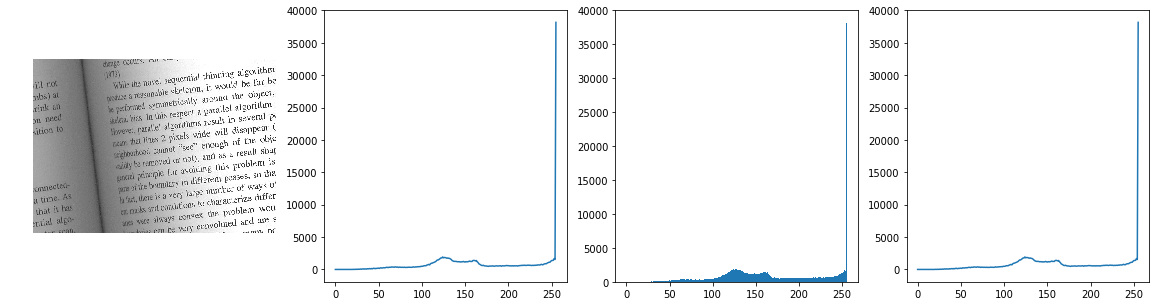

In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

image = cv2.imread('./test_data/table_small2.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(gray,norm=clr.NoNorm(0,255),cmap='gray') # show the original image
plt.axis('off')

plt.subplot(1,4,2)
hist = cv2.calcHist([gray],[0],None,[256],[0,256]) # openCV's calcHist
plt.plot(np.arange(hist.size),hist)

plt.subplot(1,4,3)
plt.hist(gray.ravel(),256,[0,256]) # matplotlib.pyplot's show histogram

plt.subplot(1,4,4)
hist = np.histogram(gray.ravel(),bins=256,range=[0,256]) # numpy's histogram
plt.plot(np.arange(256),hist[0])

plt.show()

### Binary thresholding by a fixed threshold value

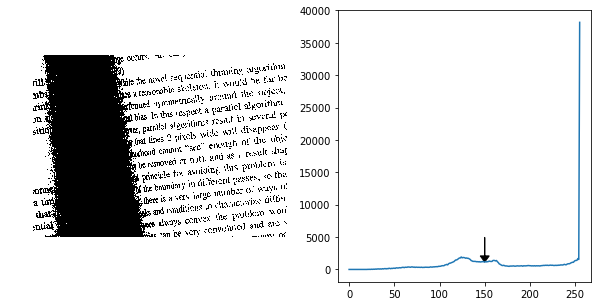

In [144]:
plt.figure(figsize=(10,5))
thr, result = cv2.threshold(gray,150,255,cv2.THRESH_BINARY) # the threshold value is 150
plt.subplot(1,2,1)
plt.imshow(result,norm=clr.NoNorm(0,255),cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(np.arange(hist[0].size),hist[0])
plt.arrow(thr, hist[0][int(thr)]+np.max(hist[0])/10, 0, -np.max(hist[0])*3/40, head_width=10, head_length=np.max(hist[0])/40, fc='k', ec='k')
plt.show()

### Automatic binary thresholding by Otsu's method

threshold value:182.0


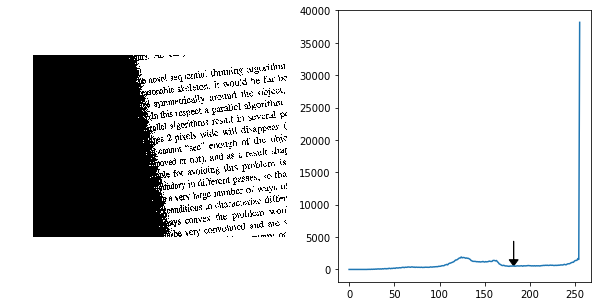

In [145]:
plt.figure(figsize=(10,5))
thr, result = cv2.threshold(gray,140,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print('threshold value:{}'.format(thr))
plt.subplot(1,2,1)
plt.imshow(result,norm=clr.NoNorm(0,255),cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(np.arange(hist[0].size),hist[0])
plt.arrow(thr, hist[0][int(thr)]+np.max(hist[0])/10, 0, -np.max(hist[0])*3/40, head_width=10, head_length=np.max(hist[0])/40, fc='k', ec='k')
plt.show()

### Automatic binary thresholding by the triangle algorithm

threshold value:253.0


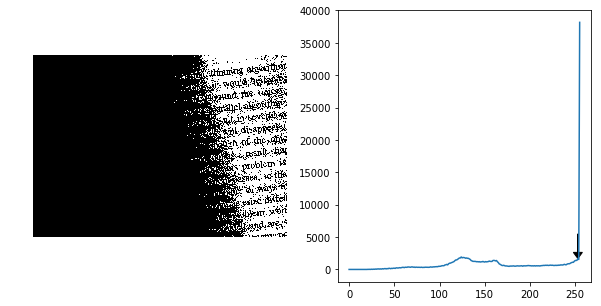

In [146]:
plt.figure(figsize=(10,5))
thr, result = cv2.threshold(gray,140,255,cv2.THRESH_BINARY|cv2.THRESH_TRIANGLE)
print('threshold value:{}'.format(thr))
plt.subplot(1,2,1)
plt.imshow(result,norm=clr.NoNorm(0,255),cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(np.arange(hist[0].size),hist[0])
plt.arrow(thr, hist[0][int(thr)]+np.max(hist[0])/10, 0, -np.max(hist[0])*3/40, head_width=10, head_length=np.max(hist[0])/40, fc='k', ec='k')
plt.show()

### Adaptive thresholding

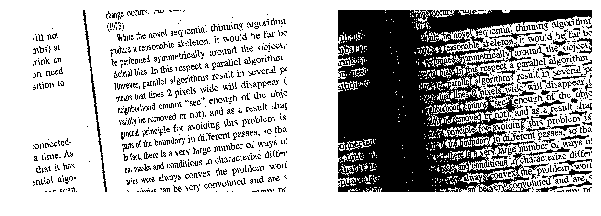

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
result = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 10)
plt.imshow(result,norm=clr.NoNorm(0,255),cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
result = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -10)
plt.imshow(result,norm=clr.NoNorm(0,255),cmap='gray')
plt.axis('off')

plt.show()